# Classification Price Range
In this project we are analyzing product data and predict a price range based on the features using sklearn. In the first step some visualization are done to gain knowledge about the dataset, the correlations and data cleaning issues.

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## 1. Import Data

In [188]:
df = pd.read_csv("MobilePhone.csv")
df.head()

,battery_power,blue,dual_sim,frontcamermegapixels,four_g,int_memory,three_g,touch_screen,Price Range
0,1043,1,1,14,0,5,0,1,h
1,841,1,1,4,1,61,1,0,m
2,1807,1,0,1,0,27,0,1,l
3,1546,0,1,18,1,25,1,1,h
4,1434,0,0,11,1,49,1,0,h


In [189]:
df.describe()

,battery_power,blue,dual_sim,frontcamermegapixels,four_g,int_memory,three_g,touch_screen
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1265.292079,0.512376,0.544554,4.571782,0.472772,33.811881,0.732673,0.492574
std,440.254409,0.500467,0.498628,4.444563,0.499877,18.288541,0.443113,0.500565
min,500.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,900.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000
50%,1270.500000,1.000000,1.000000,3.000000,0.000000,34.000000,1.000000,0.000000
75%,1654.250000,1.000000,1.000000,7.000000,1.000000,50.000000,1.000000,1.000000
max,1999.000000,1.000000,1.000000,18.000000,1.000000,64.000000,1.000000,1.000000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   battery_power         404 non-null    int64 
 1   blue                  404 non-null    int64 
 2   dual_sim              404 non-null    int64 
 3   frontcamermegapixels  404 non-null    int64 
 4   four_g                404 non-null    int64 
 5   int_memory            404 non-null    int64 
 6   three_g               404 non-null    int64 
 7   touch_screen          404 non-null    int64 
 8   Price Range           404 non-null    object
dtypes: int64(8), object(1)
memory usage: 28.5+ KB


In [191]:
# Check for duplicated rows

df[df.duplicated(keep=False) == True]

,battery_power,blue,dual_sim,frontcamermegapixels,four_g,int_memory,three_g,touch_screen,Price Range


In [192]:
# Check for duplicated features

df_labels = df.drop(["Price Range"], axis=1)
df_labels[df_labels.duplicated(keep=False) == True]

,battery_power,blue,dual_sim,frontcamermegapixels,four_g,int_memory,three_g,touch_screen


## 2. Visualise Data

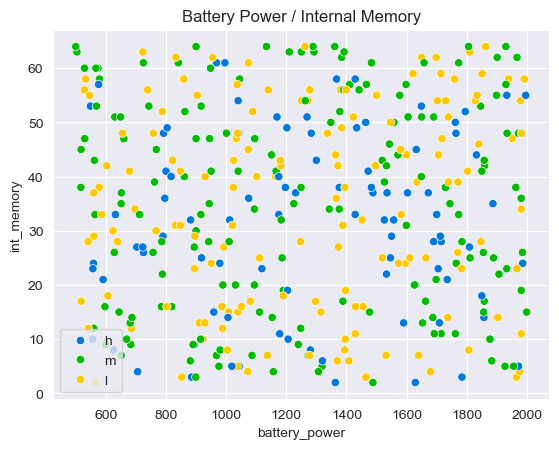

In [194]:
# Battery Power / Internal Memory

sns.set_style("darkgrid")
sns.scatterplot(df, x="battery_power", y="int_memory", hue="Price Range", palette="nipy_spectral")
plt.title("Battery Power / Internal Memory")
plt.legend( loc="lower left", bbox_to_anchor=[0,0])

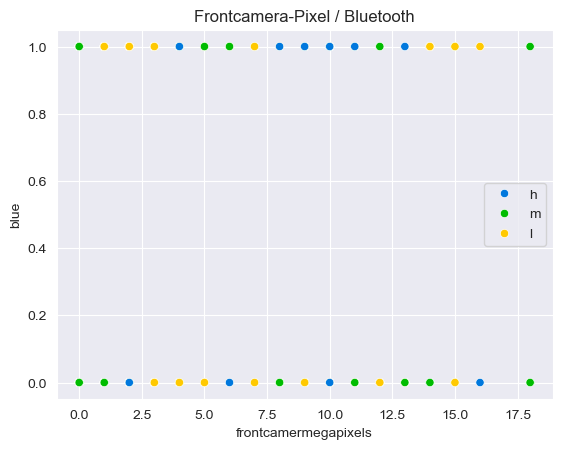

In [195]:
# Frontcamera-Pixel / Bluetooth

sns.scatterplot(df, x="frontcamermegapixels", y="blue", hue="Price Range", palette="nipy_spectral")
plt.title("Frontcamera-Pixel / Bluetooth")
plt.legend( loc="right")

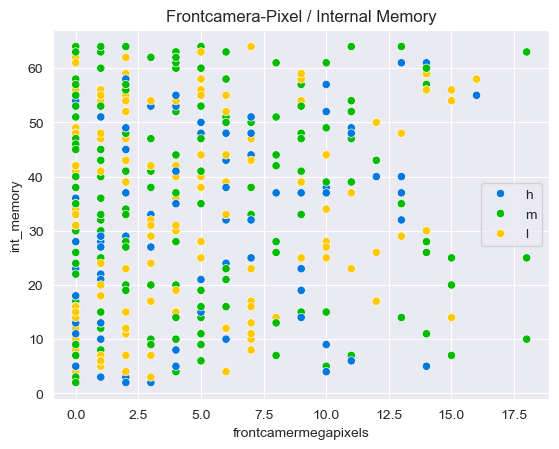

In [196]:
# Frontcamera-Pixel / Internal Memory

sns.scatterplot(df, x="frontcamermegapixels", y="int_memory", hue="Price Range", palette="nipy_spectral")
plt.title("Frontcamera-Pixel / Internal Memory")
plt.legend( loc="right")

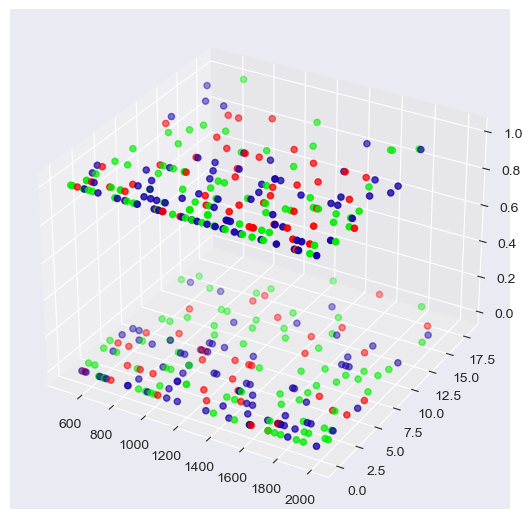

In [213]:
# 3D Scatterplot

# Create numeric price for hue
price_d = {"l": 1, "m":2, "h":3}

df["price_cat"] = df["Price Range"].map(price_d)

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("nipy_spectral"))

sc_plot = ax.scatter(xs=df2["battery_power"], ys=df2["frontcamermegapixels"], zs=df["blue"], c=df2["price_cat"] , cmap=cmap)

## RandomForestClassifier for Classification


In [219]:
# Standard Scaling data

X = df.drop(["Price Range", "price_cat"], axis=1)
y = df["Price Range"]

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [259]:
# Random Forest Classifier

# Split for test/train data
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

# RFC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_predict_y_test = rfc.predict(X_test)

# Metrics
rfc_classification_report = classification_report(y_test, rfc_predict_y_test)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict_y_test)

print(rfc_classification_report)
print(rfc_confusion_matrix)

              precision    recall  f1-score   support

           h       0.31      0.36      0.33        14
           l       0.31      0.29      0.30        31
           m       0.42      0.42      0.42        36

    accuracy                           0.36        81
   macro avg       0.35      0.35      0.35        81
weighted avg       0.36      0.36      0.36        81

[[ 5  3  6]
 [ 7  9 15]
 [ 4 17 15]]


In [261]:
# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_predict_y_test = knn.predict(X_test)

# Metrics
print(classification_report(y_test, knn_predict_y_test))
print(confusion_matrix(y_test, knn_predict_y_test))

              precision    recall  f1-score   support

           h       0.23      0.36      0.28        14
           l       0.41      0.48      0.44        31
           m       0.45      0.28      0.34        36

    accuracy                           0.37        81
   macro avg       0.36      0.37      0.35        81
weighted avg       0.40      0.37      0.37        81

[[ 5  6  3]
 [ 7 15  9]
 [10 16 10]]
